In [1]:
#Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("Product_Ratings_Dataset.xls")
print(data)

           UserId    ProductId  Rating   Timestamp
0       User44084  Product8646       3  1513224892
1       User32096  Product2879       3  1396046321
2       User48182  Product2150       3  1430840372
3       User48214  Product4226       4  1264279238
4       User27633  Product5750       3  1530777749
...           ...          ...     ...         ...
100071  User28844  Product7689       5  1528133693
100072  User24768  Product6914       5  1627781180
100073   User9547  Product2205       3  1501029965
100074  User47066  Product4386       2  1311893418
100075  User26984  Product3638       4  1274091928

[100076 rows x 4 columns]


In [3]:
data.tail()

,UserId,ProductId,Rating,Timestamp
100071,User28844,Product7689,5,1528133693
100072,User24768,Product6914,5,1627781180
100073,User9547,Product2205,3,1501029965
100074,User47066,Product4386,2,1311893418
100075,User26984,Product3638,4,1274091928


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100076 entries, 0 to 100075
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   UserId     100076 non-null  object
 1   ProductId  100076 non-null  object
 2   Rating     100076 non-null  int64 
 3   Timestamp  100076 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.1+ MB


In [5]:
data

,UserId,ProductId,Rating,Timestamp
0,User44084,Product8646,3,1513224892
1,User32096,Product2879,3,1396046321
2,User48182,Product2150,3,1430840372
3,User48214,Product4226,4,1264279238
4,User27633,Product5750,3,1530777749
...,...,...,...,...
100071,User28844,Product7689,5,1528133693
100072,User24768,Product6914,5,1627781180
100073,User9547,Product2205,3,1501029965
100074,User47066,Product4386,2,1311893418


In [6]:
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(100076, 4)


In [7]:
data.shape

(100076, 4)

In [8]:
data.dtypes

UserId       object
ProductId    object
Rating        int64
Timestamp     int64
dtype: object

In [9]:
data.isnull().sum()

UserId       0
ProductId    0
Rating       0
Timestamp    0
dtype: int64

In [10]:
data[data.duplicated]

,UserId,ProductId,Rating,Timestamp


In [11]:
data[data.duplicated(keep = False)]

,UserId,ProductId,Rating,Timestamp


<Axes: >

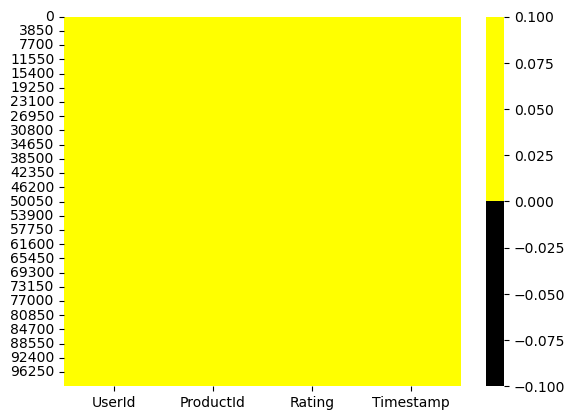

In [12]:
#Visualize data1 missing values using graph
cols = data.columns
colours = ['Black', 'Yellow']
sns.heatmap(data[cols].isnull(),cmap=sns.color_palette(colours),cbar = True)

# Observations:
# There are no null values in the dataset.
# There are no duplicate values in the dataset.

In [14]:
median_Rating = data["Rating"].median()
mean_Rating = data["Rating"].mean()
print("Median of Rating: ", median_Rating)
print("Mean of Rating: ", mean_Rating)

Median of Rating:  3.0
Mean of Rating:  2.9975618529917263


In [15]:
median_timestamp = data["Timestamp"].median()
mean_timestamp = data["Timestamp"].mean()
print("Median of Timestamp: ", median_timestamp)
print("Mean of Timestamp: ", mean_timestamp)

Median of Timestamp:  1467458944.0
Mean of Timestamp:  1467586188.0292277


In [16]:
#Find the mode values of categorical column (Rating)
print(data["Rating"].value_counts())
mode_rating = data["Rating"].mode()[0]
print(mode_rating)

Rating
2    20193
4    20059
1    19981
5    19926
3    19917
Name: count, dtype: int64
2


In [17]:
data.reset_index(drop = True)

,UserId,ProductId,Rating,Timestamp
0,User44084,Product8646,3,1513224892
1,User32096,Product2879,3,1396046321
2,User48182,Product2150,3,1430840372
3,User48214,Product4226,4,1264279238
4,User27633,Product5750,3,1530777749
...,...,...,...,...
100071,User28844,Product7689,5,1528133693
100072,User24768,Product6914,5,1627781180
100073,User9547,Product2205,3,1501029965
100074,User47066,Product4386,2,1311893418


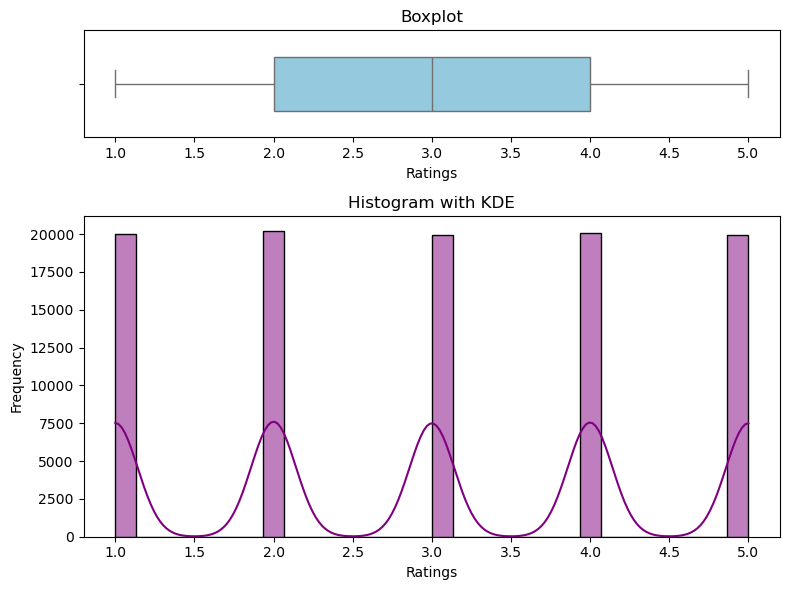

In [18]:
#Create a figure with two subplots, stacked vertically
fig, axes = plt.subplots(2,1, figsize=(8,6), gridspec_kw={'height_ratios' : [1,3]})

#Plot the boxplot in the first (top) subplot
sns.boxplot(data=data["Rating"], ax=axes[0], color='skyblue', width=0.5, orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Ratings")

#Plot the histogram with KDE curve in the second (bottom) subplot
sns.histplot(data["Rating"], kde=True, ax=axes[1], color='purple', bins=30)
axes[1].set_title("Histogram with KDE")
axes[1].set_xlabel("Ratings")
axes[1].set_ylabel("Frequency")

#Adjust layout for better spacing
plt.tight_layout()

#Show the plot
plt.show()

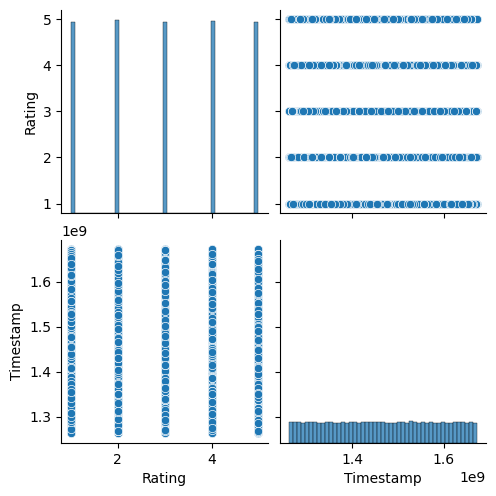

In [19]:
sns.pairplot(data)

<Axes: >

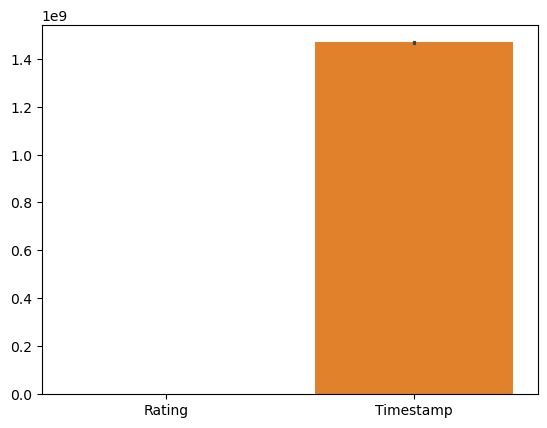

In [20]:
sns.barplot(data)

In [21]:
print(data.iloc[0:43227])

          UserId    ProductId  Rating   Timestamp
0      User44084  Product8646       3  1513224892
1      User32096  Product2879       3  1396046321
2      User48182  Product2150       3  1430840372
3      User48214  Product4226       4  1264279238
4      User27633  Product5750       3  1530777749
...          ...          ...     ...         ...
43222  User39127  Product5582       2  1561248410
43223  User26595   Product596       1  1440601123
43224  User31054  Product9750       4  1353616122
43225  User44315  Product8000       4  1348557487
43226  User14524  Product5985       2  1614335316

[43227 rows x 4 columns]


In [22]:
print(data.UserId.unique())
len(data.UserId.unique())

['User44084' 'User32096' 'User48182' ... 'User39764' 'User28164'
 'User3767']


43227

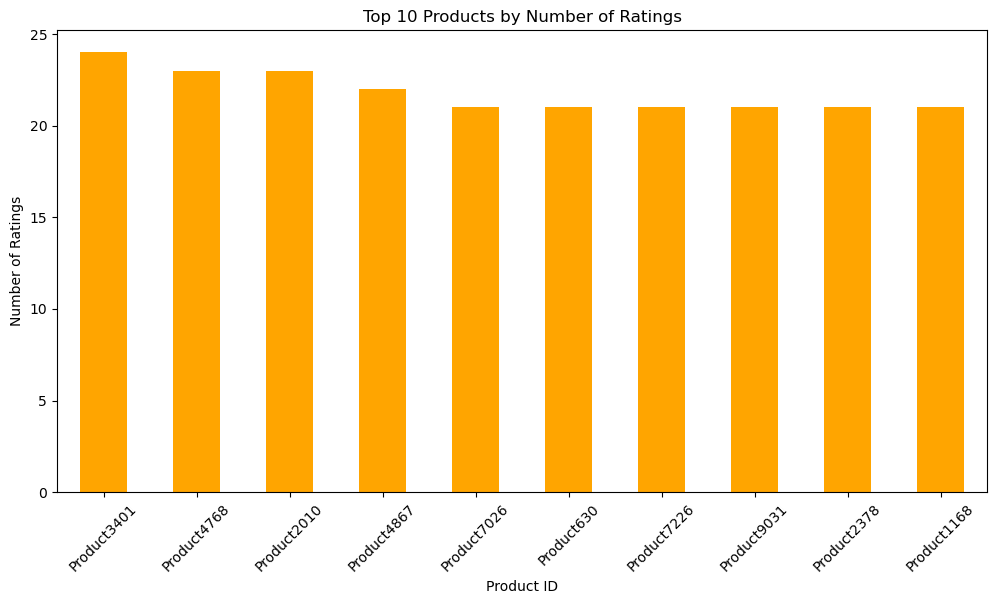

In [23]:
# Group by product and count the number of ratings
product_rating_counts = data.groupby('ProductId')['UserId'].count()  # Assuming columns: productid, userid, ratings
product_rating_counts = product_rating_counts.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
product_rating_counts.head(10).plot(kind='bar', color='orange')  # Display the top 10 products
plt.title('Top 10 Products by Number of Ratings')
plt.xlabel('Product ID')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()

In [24]:
pivot_table = data.pivot_table(index='UserId', columns='ProductId', values='Rating', fill_value=0)
print(pivot_table)

ProductId  Product1  Product10  Product100  Product1000  Product1001  \
UserId                                                                 
User1           0.0        0.0         0.0          0.0          0.0   
User10          0.0        0.0         0.0          0.0          0.0   
User100         0.0        0.0         0.0          0.0          0.0   
User1000        0.0        0.0         0.0          0.0          0.0   
User10001       0.0        0.0         0.0          0.0          0.0   
...             ...        ...         ...          ...          ...   
User9995        0.0        0.0         3.0          0.0          0.0   
User9996        0.0        0.0         0.0          0.0          0.0   
User9997        0.0        0.0         0.0          0.0          0.0   
User9998        0.0        0.0         0.0          0.0          0.0   
User9999        0.0        0.0         0.0          0.0          0.0   

ProductId  Product1002  Product1003  Product1004  Product1005  

In [25]:
# Preview the data to understand its structure
print("Preview of the dataset:\n", data.head())

# Select a subset of the dataset (e.g., first few rows and columns)
data_subset = data.iloc[:1000, :500]  # Example: first 10 rows and 5 columns

# Convert all columns to numeric, handling errors
data_subset = data_subset.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with 0 (or another appropriate value)
data_subset = data_subset.fillna(0)

# Convert the DataFrame to a numpy array
interaction_matrix = data_subset.values

# Calculate User-to-User Similarities
user_similarities = cosine_similarity(interaction_matrix)
print("\nUser-to-User Similarities:")
print(pd.DataFrame(user_similarities))

# Calculate Product-to-Product Similarities
product_similarities = cosine_similarity(interaction_matrix.T)
print("\nProduct-to-Product Similarities:")
print(pd.DataFrame(product_similarities))

# Recommendation Example: Find top similar users and products
def recommend_user(user_index, top_n=2):
    similar_users = np.argsort(user_similarities[user_index])[::-1][:top_n+1]
    similar_users = [data_subset.index[i] for i in similar_users if i != user_index]
    return similar_users

def recommend_product(product_index, top_n=2):
    similar_products = np.argsort(product_similarities[product_index])[::-1][:top_n+1]
    similar_products = [data_subset.columns[i] for i in similar_products if i != product_index]
    return similar_products

# Example Recommendations:
user_idx = 0  # Replace with an actual user index
product_idx = 0  # Replace with an actual product index

print(f"\nUsers similar to {data_subset.index[user_idx]}: {recommend_user(user_idx)}")
print(f"Products similar to {data_subset.columns[product_idx]}: {recommend_product(product_idx)}")

Preview of the dataset:
       UserId    ProductId  Rating   Timestamp
0  User44084  Product8646       3  1513224892
1  User32096  Product2879       3  1396046321
2  User48182  Product2150       3  1430840372
3  User48214  Product4226       4  1264279238
4  User27633  Product5750       3  1530777749

User-to-User Similarities:
     0    1    2    3    4    5    6    7    8    9    ...  990  991  992  \
0    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
1    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
2    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
3    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
4    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
995  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
996  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  

In [27]:
# Ensure that UserId and ProductId remain as their original values
data['UserId'] = data['UserId']
data['ProductId'] = data['ProductId']

# Convert other columns to numeric, handling errors
numeric_columns = ['Rating', 'Timestamp']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill missing values in numeric columns with 0
data = data.fillna(0)
print("Preprocessed Data:\n", data.head())
print(data[['UserId', 'ProductId']].value_counts())  # Ensure values are not zeroes

Preprocessed Data:
       UserId    ProductId  Rating   Timestamp
0  User44084  Product8646       3  1513224892
1  User32096  Product2879       3  1396046321
2  User48182  Product2150       3  1430840372
3  User48214  Product4226       4  1264279238
4  User27633  Product5750       3  1530777749
UserId     ProductId  
User27167  Product7668    2
User1064   Product755     2
User16705  Product6181    2
User9450   Product4666    2
User4030   Product6065    2
                         ..
User24874  Product4662    1
           Product414     1
           Product3726    1
           Product1700    1
User9999   Product6246    1
Name: count, Length: 100066, dtype: int64


In [28]:
interaction_matrix = data_subset.values

# Calculate user-to-user similarities
user_similarities = cosine_similarity(interaction_matrix)

# Create a user similarity DataFrame
user_similarity_df = pd.DataFrame(user_similarities, index=data_subset.index, columns=data_subset.index)
print("\nUser Similarity Table:\n", user_similarity_df)

# Calculate product-to-product similarities (transpose the matrix for products)
product_similarities = cosine_similarity(interaction_matrix.T)

# Create a product similarity DataFrame
product_similarity_df = pd.DataFrame(product_similarities, index=data_subset.columns, columns=data_subset.columns)
print("\nProduct Similarity Table:\n", product_similarity_df)

# Step 4: Split the dataset into training and test sets
# Convert DataFrame to numpy array for splitting
X = interaction_matrix

# Create a dummy target variable (can be customized as per your requirement)
# Here, we use the sum of each row as the target for demonstration purposes
y = np.sum(X, axis=1)

# Split into train and test datasets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTrain Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)


User Similarity Table:
      0    1    2    3    4    5    6    7    8    9    ...  990  991  992  \
0    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
1    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
2    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
3    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
4    1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
995  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
996  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
997  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
998  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   
999  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   

     993  994  995  996  997  998  999  
0    1.0 

In [30]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Load your dataset
# Replace 'your_dataset.csv' with your actual dataset
data = pd.read_csv('Product_Ratings_Dataset.xls')

# Step 2: Create a subset of the dataset
# Example: Select the first 10 rows
subset = data.iloc[:10]  # Modify the range to select a different subset

# Ensure the subset contains the necessary columns: UserId, ProductId, Rating
# Fill missing values with 0 if necessary
subset = subset.fillna(0)

# Step 3: Create an interaction matrix
interaction_matrix = pd.pivot_table(subset, values='Rating', index='UserId', columns='ProductId', fill_value=0)

# Step 4: Compute User-to-User Similarities
user_similarities = cosine_similarity(interaction_matrix)
user_similarity_df = pd.DataFrame(user_similarities, index=interaction_matrix.index.astype(str), columns=interaction_matrix.index.astype(str))

# Step 5: Compute Product-to-Product Similarities
product_similarities = cosine_similarity(interaction_matrix.T)
product_similarity_df = pd.DataFrame(product_similarities, index=interaction_matrix.columns.astype(str), columns=interaction_matrix.columns.astype(str))

# Step 6: Generate Recommendations
def recommend_users(user_id, top_n=2):
    """Recommend top N similar users for a given user."""
    user_id = str(user_id)  # Ensure user_id is a string for lookup
    if user_id not in user_similarity_df.index:
        return []  # Return an empty list if the user_id doesn't exist
    similar_users = user_similarity_df.loc[user_id].sort_values(ascending=False).index[1:top_n+1]
    return similar_users.tolist()

def recommend_products(product_id, top_n=2):
    """Recommend top N similar products for a given product."""
    product_id = str(product_id)  # Ensure product_id is a string for lookup
    if product_id not in product_similarity_df.index:
        return []  # Return an empty list if the product_id doesn't exist
    similar_products = product_similarity_df.loc[product_id].sort_values(ascending=False).index[1:top_n+1]
    return similar_products.tolist()

# Example usage:
# Use valid UserId and ProductId from the selected subset
user_id = subset['UserId'].iloc[0]  # Take the first user ID from the subset
product_id = subset['ProductId'].iloc[0]  # Take the first product ID from the subset
print(f"Users similar to User {user_id}: {recommend_users(user_id)}")
print(f"Products similar to Product {product_id}: {recommend_products(product_id)}")

Users similar to User User44084: ['User18800', 'User2446']
Products similar to Product Product8646: ['Product2150', 'Product2246']
